In [26]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


## Import of the data

In [27]:
# connection to SQL server
connection = pyodbc.connect('Driver={SQL Server};'
                            'Server=localhost\SQLEXPRESS;'
                            'Database=Algebra_Personality_Database;'
                            'Trusted_Connection=yes;')

cursor = connection.cursor()

# making the data set
big_5_dataset = pd.read_sql_query('SELECT TOP(50000) * FROM [data-final]', connection)


## Average time spent on an item for every dimension

Text(0, 0.5, 'Milliseconds')

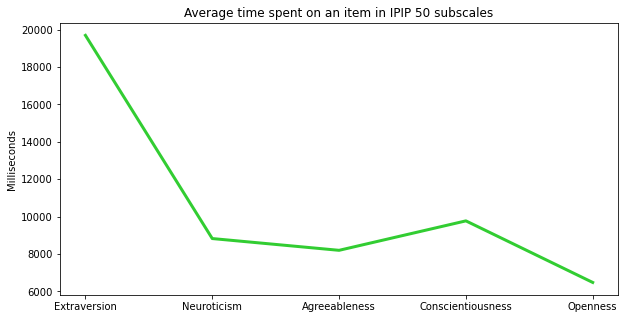

In [28]:
# personality dimensions
dimensions = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness','Openness']

# get a list of average time spent per dimension

time_means = []
lower = 50
upper = 60

for number in range(5):
    mean = big_5_dataset.iloc[:,lower:upper].mean(axis=1).mean()
    time_means.append(mean)
    lower += 10
    upper += 10

# line plot
means = pd.DataFrame(time_means, index = dimensions)

f0, axes = plt.subplots(figsize = (10,5) )

kws = dict(linewidth=3)
plot = sns.lineplot(x=dimensions, y=time_means, **kws, color = "limegreen")

plt.title('Average time spent on an item in IPIP 50 subscales')
plt.ylabel('Milliseconds')


## Personality dimensions 

In [29]:
# new df with IPIP 50 items only
personality_df = big_5_dataset.iloc[:,0:50]

print(personality_df.columns)

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')


## Preparing the data

In [30]:
# columns that need to be reversed  
columns_to_reverse = ['EXT2','EXT4', 'EXT6','EXT8','EXT10','EST2', 'EST4', 'AGR1', 'AGR3', 'AGR5', 'AGR7', 'CSN2', 'CSN4', 'CSN6','CSN8', 'OPN2', 'OPN4', 'OPN6']


# save original variables
for column_name in columns_to_reverse:
    personality_df['o_'+column_name] = personality_df[column_name]

    
personality_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,o_AGR3,o_AGR5,o_AGR7,o_CSN2,o_CSN4,o_CSN6,o_CSN8,o_OPN2,o_OPN4,o_OPN6
0,1.0,1.0,5.0,3.0,4.0,2.0,5.0,4.0,4.0,1.0,...,4.0,5.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,3.0
1,4.0,1.0,5.0,2.0,4.0,1.0,3.0,4.0,5.0,2.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,5.0,1.0,5.0,1.0,2.0,1.0,4.0,3.0,5.0,...,4.0,4.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,3.0
3,1.0,4.0,2.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,1.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0,5.0,...,1.0,4.0,4.0,4.0,3.0,5.0,1.0,3.0,3.0,3.0


In [31]:
# recode the variables
original = [0,1,2,3,4,5]
new = [0,5,4,3,2,1]

for column_name in columns_to_reverse:
    personality_df[column_name] = personality_df[column_name].replace(original, new)
   
personality_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,o_AGR3,o_AGR5,o_AGR7,o_CSN2,o_CSN4,o_CSN6,o_CSN8,o_OPN2,o_OPN4,o_OPN6
0,1.0,5.0,5.0,3.0,4.0,4.0,5.0,2.0,4.0,5.0,...,4.0,5.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,3.0
1,4.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,5.0,4.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,3.0,1.0,...,4.0,4.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,3.0
3,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,...,4.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,1.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,4.0,4.0,4.0,3.0,5.0,1.0,3.0,3.0,3.0


In [32]:
# replace 0 wit NaN
personality_df = personality_df.replace([0],[float('NaN')])

In [33]:
# remove cases with 3 or more missing values on any personality dimension

# define the function
def remove_missing (df, col_no1, col_no2):
     df = df[df.iloc[:,col_no1:col_no2].isnull().sum(axis=1)<3]
     return df

# clean dataset
personality_df_clean = (personality_df.
                        # Extraversion
                       pipe(remove_missing, 0, 10).
                        # Neuroticism
                       pipe(remove_missing, 10, 20).
                        # Agreeableness
                       pipe(remove_missing, 20, 30).
                        # Conscientiousness
                       pipe(remove_missing, 30, 40).
                        # Openness
                       pipe(remove_missing, 40, 50))


In [34]:
# check how many cases were removed

print(len(personality_df) - len(personality_df_clean))

401


In [35]:
# add a  column for every personality dimension as a mean

personality_df_clean['Extraversion'] = personality_df_clean.iloc[:,0:10].mean(axis=1)
personality_df_clean['Neuroticism'] = personality_df_clean.iloc[:,10:20].mean(axis=1)
personality_df_clean['Agreeableness'] = personality_df_clean.iloc[:,20:30].mean(axis=1)
personality_df_clean['Conscientiousness'] = personality_df_clean.iloc[:,30:40].mean(axis=1)
personality_df_clean['Openness'] = personality_df_clean.iloc[:,40:50].mean(axis=1)

personality_df_clean.iloc[:,-5:].head()

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,3.8,1.800000,1.8,4.0,3.6
1,4.1,1.400000,4.0,4.4,4.8
2,1.6,3.444444,2.3,3.7,3.6
3,1.6,4.300000,3.3,3.0,3.3
4,1.9,2.700000,3.1,3.1,3.4


In [36]:
#descriptives for the dimensions

personality_df_clean.iloc[:,-5:].describe()

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
count,49599.000000,49599.000000,49599.000000,49599.000000,49599.000000
mean,2.975322,3.063168,3.772971,3.367365,3.887739
std,0.904045,0.854397,0.724035,0.738004,0.633596
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.300000,2.400000,3.300000,2.800000,3.500000
50%,3.000000,3.100000,3.900000,3.400000,3.900000
75%,3.600000,3.700000,4.300000,3.900000,4.400000
max,5.000000,5.000000,5.000000,5.000000,5.000000


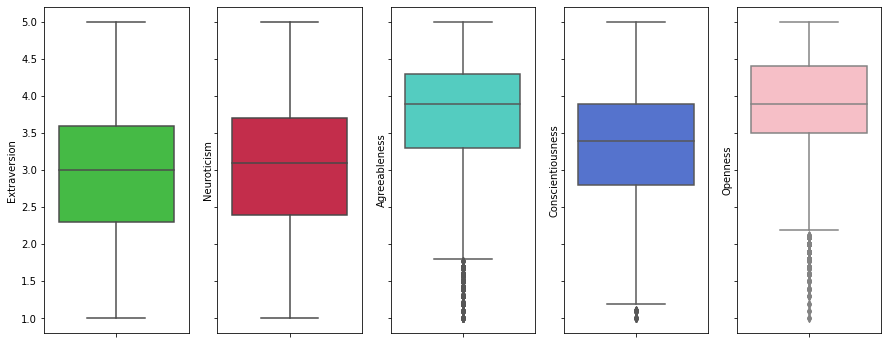

In [37]:
#plot the dimensions

f1, axes = plt.subplots(1,5, figsize=(15,6), sharex=True, sharey=True)

p1 = sns.boxplot(y=personality_df_clean['Extraversion'], ax = axes[0], color = "limegreen")
p2 = sns.boxplot(y=personality_df_clean['Neuroticism'], ax = axes[1], color = "crimson")
p3 = sns.boxplot(y=personality_df_clean['Agreeableness'], ax = axes[2], color = "turquoise")
p4 = sns.boxplot(y=personality_df_clean['Conscientiousness'], ax = axes[3], color = "royalblue")
p5 = sns.boxplot(y=personality_df_clean['Openness'], ax = axes[4], color = "lightpink")

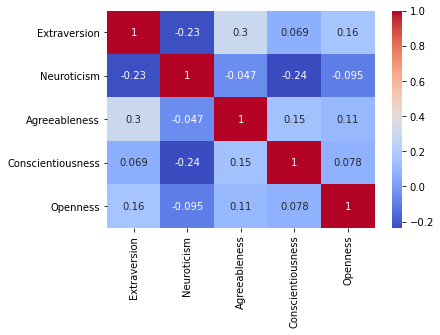

In [38]:
# plot dimension correlations

dim_corr = sns.heatmap(personality_df_clean.iloc[:,-5:].corr(), annot = True, cmap = 'coolwarm')

## Logistic regression

In [39]:
# The goal: predict if the person is in the top 5% on neuroticism 
# based on other personality dimensions

# creating the dummy variable
N_top_5 = []

critical_value = np.quantile(personality_df_clean['Neuroticism'], 0.95)

for item in personality_df_clean['Neuroticism']:
    if item > critical_value:
        N_top_5.append(1)
    else:
        N_top_5.append(0)

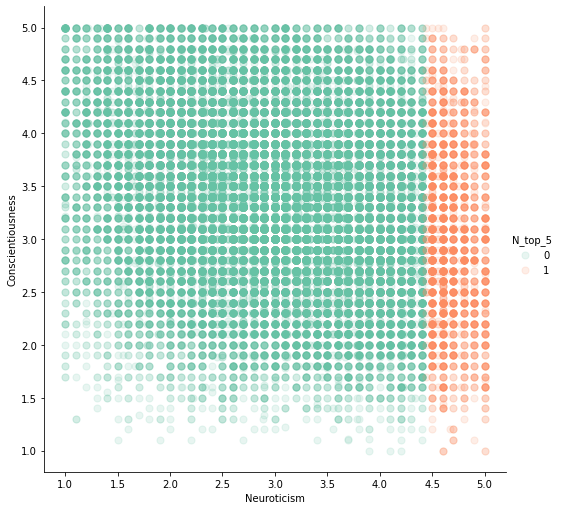

In [40]:
# include the variable as a column in the DF
personality_df_clean['N_top_5'] = N_top_5


# plot of neuroticism and conscientiousness taking top 5% into account
n_plot = sns.lmplot(data = personality_df_clean,
                    x = 'Neuroticism',
                    y = 'Conscientiousness',
                    hue = 'N_top_5',
                    height = 7,
                    fit_reg=False,
                    palette = "Set2",
                    scatter_kws={'s':50, 'alpha':0.15},
                    line_kws = {"lw":4})

In [41]:
# defining the data

# predictors
x = personality_df_clean.filter(regex = "^(?!EX).*", axis = 1).iloc[:,:40]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x)
x = imputer.transform(x)

# criterium
y = personality_df_clean.N_top_5

In [42]:
# splitting the training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fitting the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [44]:
# predictions
y_pred = classifier.predict(X_test)

Accuracy score is 0.9995967741935484


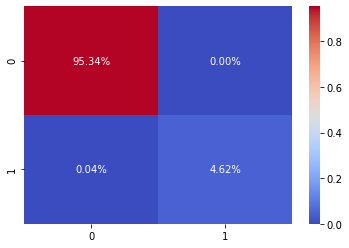

In [45]:
#confusion matrix and accuracy

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
con = confusion_matrix(Y_test, y_pred)

print ('Accuracy score is '+ str(accuracy_score(Y_test, y_pred)))
   

conf_m = sns.heatmap((con/np.sum(con)), 
                     annot = True, 
                     cmap = 'coolwarm', 
                     fmt ='.2%')
